## 20 Feb Assignment

### Date 20.02.2023

# Q1. Explain GET and POST methods.



## Answer:-

# GET Method

The GET method is used to request the server to GET the data or information. It should not be used with the requesting sensitive data, and there are certain limits to the requesting data. GET requests to remain in the browser history, and it can also be bookmarked. GET requests can be cached.

To use the GET method, we should have installed the library which supports the GET request like urllib,httplib, or requests.
We can install the requests library using the following command in the command prompt:

In [3]:
pip install requests  

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Example 1

In [ ]:
import requests

response = requests.get('https://www.example.com')

if response.status_code == 200:
    print(response.text)
else:
    print('Error:', response.status_code)


Explanation:

Once we have installed the requests library, we can start making HTTP requests using the requests.get() method. The get() method takes one mandatory argument, which is the URL we want to request. In the example above, the URL is 'https://www.example.com'.

When we make a request using the get() method, requests sends an HTTP GET request to the specified URL and waits for the server to respond. Once a response is received, requests returns a Response object that contains the server's response to the request.

The Response object has several attributes that we can use to inspect the response. For example, we can use the status_code attribute to check the HTTP status code of the response. The HTTP status code indicates whether the request was successful or not. A status code of 200 indicates that the request was successful, while a status code of 400 or higher indicates an error.

In the example above, we check the status_code attribute of the Response object to make sure the request was successful. If the status code is 200, we print the response body using the text attribute. The text attribute returns the response body as a string.

If the request was not successful, we print an error message with the status code. This helps us diagnose any problems that may have occurred during the request.

That's a basic overview of how to use the requests.get() method in Python to make HTTP GET requests. 

In [ ]:
# Example 2

In [17]:
# importing the requests library
import requests

# api-endpoint
URL = "http://maps.googleapis.com/maps/api/geocode/json"

# location given here
location = "data science in delhi"

# defining a params dict for the parameters to be sent to the API
PARAMS = {'address':location}

# sending get request and saving the response as response object
r = requests.get(url = URL, params = PARAMS)

# extracting data in json format
data = r.json()

# checking if the API response contains any results
if len(data['results']) > 0:
    # extracting latitude, longitude and formatted address of the first matching location
    latitude = data['results'][0]['geometry']['location']['lat']
    longitude = data['results'][0]['geometry']['location']['lng']
    formatted_address = data['results'][0]['formatted_address']

    # printing the output
    print("Latitude:%s\nLongitude:%s\nFormatted Address:%s"
        %(latitude, longitude,formatted_address))
else:
    print("No results found for the given location.")


No results found for the given location.


To use the Google Maps API, you need to have an API key. The code above does not include an API key, so we didn't get any result as expe cted

if the length of the "results" list in the API response is greater than zero before extracting the latitude, longitude, and formatted address of the first matching location. If the "results" list is empty, it prints a message indicating that no results were found for the given location.

# POST Method

The POST method is used to send the data to the server. It is generally used when we want to upload data or any file to the server, like filling out a form, etc.POST requests cannot be bookmarked, and it does not remain in the browser history. It cannot be cached.
It can be used with the sensitive and private data, and it has no limit for data length.
The POST method is a powerful tool for sending data from a client to a server in Python, and the requests library provides a simple and convenient way to use it.

In [ ]:
# Basic syntax of post() function
response = requests.post(url, data=None, json=None, **kwargs)


In [ ]:
import requests

url = "https://example.com/api/submit-data"
data = {
    "name": "Nitesh Kumar",
    "email": "niteshk834@gmail.com",
    "message": " I am learning the data science from PW skills institute."
}

response = requests.post(url, data=data)

print(response.text)


In this example, we're making a POST request to https://example.com/api/submit-data with some sample data in the data dictionary. We then use requests.post() to send the data to the server. The server will receive the data in the body of the request.

After making the request, we print the response content using response.text. This will print the response body as a string.

We can also send JSON data using the POST method by passing a JSON object to the json parameter instead of the data parameter:

In [ ]:
import requests

url = "https://example.com/api/submit-data"
data = {
    "name": "Nitesh Kumar",
    "email": "niteshk834@gmail.com",
    "message": " I am learning the data science from PW skills institute."
}

response = requests.post(url, json=data)

print(response.text)


In the above example, we're using the json parameter instead of the data parameter to send the data as JSON. The server will receive the data as a JSON object in the body of the request.

##### Some important points about GET and POST methods:


1. In terms of security and safety, the GET method is not considered as a safe method because we send the data as part of the URL, so there is a high chance of data insecurity. So, it is not considered for sensitive data like passwords etc.

2. We can only send the ASCII character in the GET method, whereas there is no such restriction about the data in the POST method.

3. Since we send the data in the URL section in the GET method, there is a limitation of the data which is being sent, whereas there is no data size limitation in the POST method because we send the data in the message section.

4. As we know, we send the data as part of the URL in the GET method, so the data becomes part of the query string and is appended to the requesting URL.

# Q2. Why is request used in Flask?



## Answer:-

In Python-Flask the request module is an object that allows us to access the data sent from the user to the server (Client-Server) and that data is passed into our Flask Application

When a client sends an HTTP request to a Flask application, the request is received by the server and processed by Flask. Flask then creates a request object which represents the incoming request. This object contains information about the request, such as the HTTP method (GET, POST, etc.), the headers, query parameters, form data, and cookies.

The request object is an instance of the Request class, which is defined in the werkzeug library that Flask is built on. This class provides methods and attributes for accessing the various parts of the request.

##### Here are some of the most commonly used attributes and methods of the request object:

1. request.method: 

Returns the HTTP method used for the request (e.g. 'GET', 'POST', etc.).

2. request.args: 

Returns a MultiDict object containing the query parameters from the URL. You can access individual parameters using the get() method (e.g. request.args.get('name')).

3. request.form: 

Returns a MultiDict object containing the form data submitted in a POST request. You can access individual form fields using the get() method (e.g. request.form.get('username')).

4. request.cookies:

Returns a dictionary containing the cookies sent by the client.

5. request.headers: 

Returns a dictionary containing the HTTP headers of the request.

6. request.files: 

Returns a MultiDict object containing any files uploaded in the request.

In [ ]:
# Example 1

In [ ]:
from flask import Flask, request

app = Flask(__name__)

@app.route('/hello')
def hello():
    name = request.args.get('name', 'World')
    return f'Hello, {name}!'


In this example, the hello() function retrieves the name parameter from the query string using request.args.get(). If name is not present in the query string, it defaults to "World". The function then returns a string greeting the specified name.

In [ ]:
# Example 2

In [ ]:
from flask import Flask, request

app = Flask(__name__)

@app.route('/login', methods=['POST'])
def login():
    username = request.form.get('username')
    password = request.form.get('password')
    remember = request.form.get('remember')
    # authenticate user
    return 'Logged in successfully!'


In this example, we're defining a route for a login form that accepts POST requests. In the login() function, we're using the request.form attribute to access the username, password, and remember fields submitted in the form. We can then use this data to authenticate the user.

Overall, the request object is a powerful tool in Flask that allows you to access and process data from client requests. By using this object in your Flask application, you can create more dynamic and interactive web applications.

# Q3. Why is redirect() used in Flask?



## Answer:-

The redirect() function is used in Flask to redirect the user to a different URL. It is a convenient way to handle URL redirections in our Flask application.

In a Flask application, when a user submits a form or accesses a certain URL, we may want to redirect them to a different URL based on the outcome of their action.

In [ ]:
# Example 1

In [ ]:
from flask import Flask, redirect, url_for

app = Flask(__name__)

@app.route('/')
def index():
    # Redirect to the 'hello' URL
    return redirect(url_for('hello'))

@app.route('/hello')
def hello():
    return 'Hello, World!'


In the above example, the index() function redirects the user to the hello() function using the redirect() function. The url_for() function is used to generate the URL for the hello() function.

When a Flask application receives a request from a client, it needs to decide how to respond to that request. In some cases, it may need to redirect the user to a different URL.

For example, if a user tries to access a restricted page but they are not logged in, we may want to redirect them to the login page.

To perform a redirection in Flask, we can use the redirect() function provided by Flask. The redirect() function takes a single argument, which is the URL that the user should be redirected to. 

In [ ]:
# Example 2

In [ ]:
from flask import Flask, redirect

app = Flask(__name__)

@app.route('/login')
def login():
    # Redirect the user to the home page
    return redirect('/')

@app.route('/')
def home():
    return 'Welcome to the home page!'


In the above example, the login() function redirects the user to the home page by calling redirect('/'). When the user visits the /login URL, they will be redirected to the / URL, which will display the home page.

The redirect() function also accepts other arguments that can be used to customize the redirection. 

For example, we can specify an HTTP status code for the redirection (e.g. 301 for a permanent redirect), or we can use the url_for() function to generate the URL for the redirection dynamically based on the name of a Flask view function. Here's an example:

In [ ]:
# Example 3

In [ ]:
from flask import Flask, redirect, url_for

app = Flask(__name__)

@app.route('/login')
def login():
    # Redirect the user to the home page with a 301 status code
    return redirect(url_for('home'), 301)

@app.route('/')
def home():
    return 'Welcome to the home page!'


In the above example, the login() function uses url_for('home') to generate the URL for the home page dynamically. It also specifies a 301 status code for the redirection using the second argument to redirect().

# Q4. What are templates in Flask? Why is the render_template() function used?



## Answer:- 

Templates in Flask are an essential part of building web applications that display dynamic content. When a user visits a web page, the server generates an HTML response based on the user's request. This HTML response can include placeholders that are filled in with dynamic data, such as the user's name, a list of products, or a chart displaying the latest stock prices.

Templates allow us to define the structure and layout of our web pages using HTML, CSS, and other front-end technologies. However, templates also allow us to embed dynamic content within our HTML by using template tags or expressions.


For example:

We might have a template for displaying a list of blog posts. The template could include a loop that iterates over a list of blog post objects and generates an HTML element for each post. The actual content of each post, such as the title and body, would be passed in as variables to the template.

In [ ]:
<!DOCTYPE html>
<html>
<head>
  <title>{{ title }}</title>
</head>
<body>
  <h1>{{ title }}</h1>
  <ul>
    {% for post in posts %}
      <li>{{ post.title }}</li>
    {% endfor %}
  </ul>
</body>
</html>


In the above example, the {{ }} notation is used to denote template expressions. The title and posts variables are passed in as arguments to the render_template() function, and are used to fill in the placeholders in the template.

The render_template() function takes care of rendering the template and returning the HTML response to the client. By using templates, we can separate our application logic from our presentation logic, making it easier to maintain and update our code. We can also reuse templates across multiple pages in our application, reducing code duplication and improving consistency.

In [ ]:
# Example of render_template() function in Flask:

In [ ]:
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def index():
    name = 'Nitesh'
    return render_template('index.html', name=name)


In this example, the index() function returns the result of rendering the index.html template with the name variable passed as a parameter. The name variable is then used in the template to display a personalized message.

Templates in Flask are typically written using a templating language such as Jinja2, which provides additional features such as loops, conditionals, and filters. The render_template() function automatically handles the rendering of Jinja2 templates.

# Q5. Create a simple API. Use Postman to test it. Attach the screenshot of the output in the Jupyter Notebook.

## Answer:-

In [ ]:
from flask import Flask, request, render_template, jsonify

app = Flask(__name__)

@app.route("/postman_action", methods=["POST"])
def math_ops1():
    if (request.method =="POST"):
        ops= request.json ["operation"]
        num1= int(request.json ["num1"])
        num2= int(request.json ["num2"])
        if ops=="add":
            r= num1+num2
            result= "The sum of" + str(num1) + "and " + str(num2) + "is" + str(r)
        if ops=="subtract":
            r= num1-num2
            result= "The subtraction of" + str(num1) + "and " + str(num2) + "is" + str(r)
        if ops=="multiply":
            r= num1*num2
            result= "The multiplication of" + str(num1) + "and " + str(num2) + "is" + str(r)
        if ops=="divide":
            r= num1/num2
            result= "The division of" + str(num1) + "and " + str(num2) + "is" + str(r)

        return jsonify(result)   

         

if __name__=="__main__":
    app.run(host="0.0.0.0",port=9000)

### scrrenshot of code run in flask app

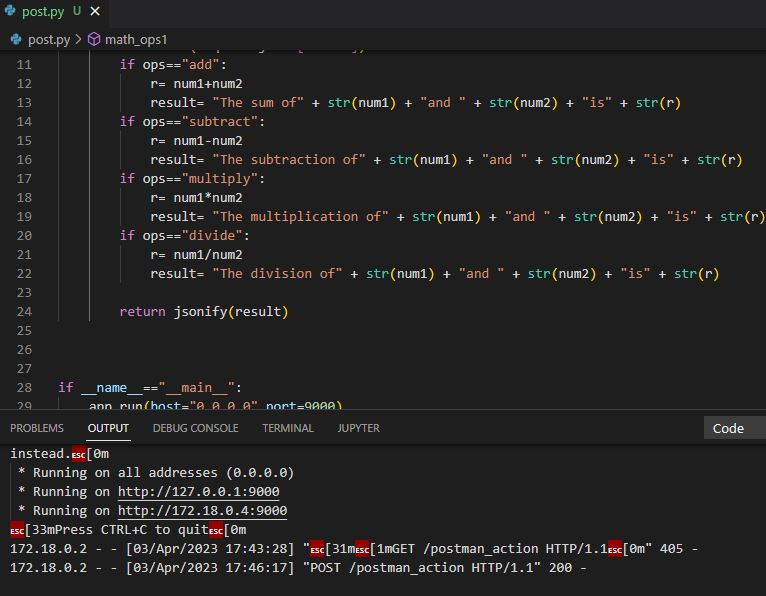

# output

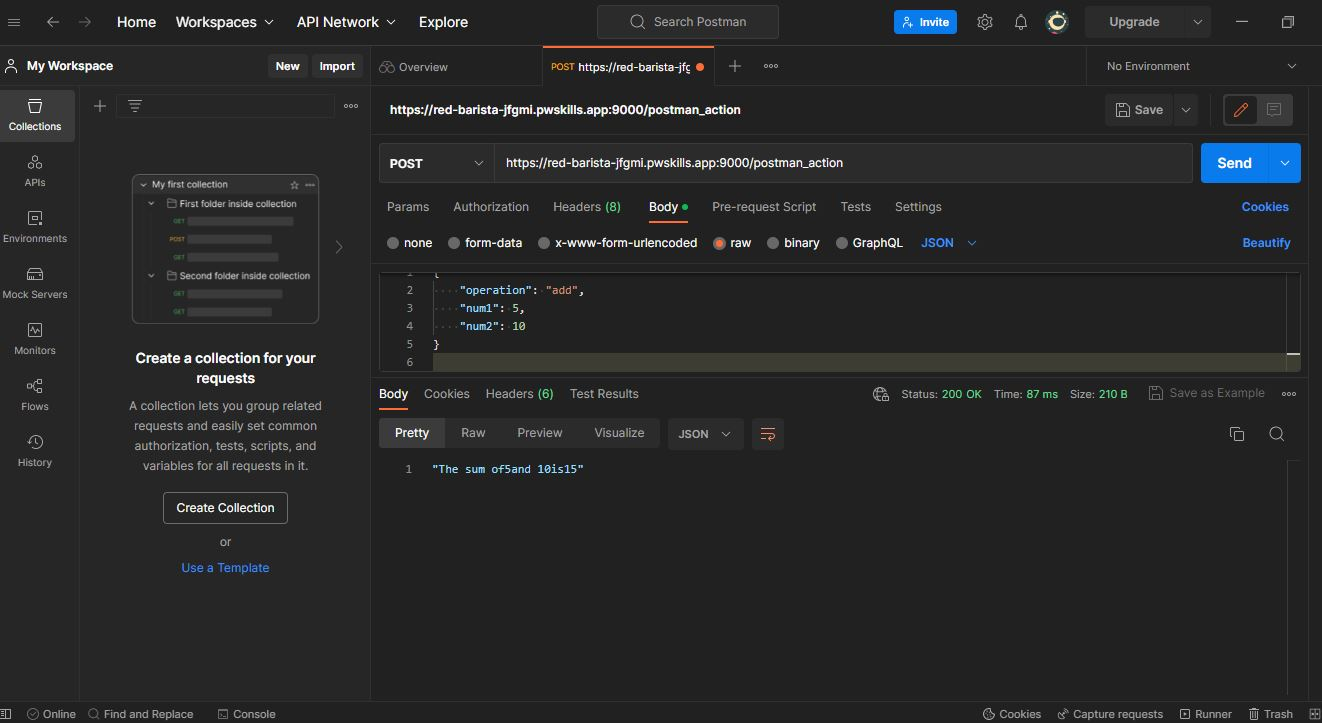